In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [6]:
df_train = pd.read_csv('df2_train_최종_13일클러변경.csv',encoding='cp949')
df_test = pd.read_csv('df2_test_최종_13일클러변경.csv',encoding='cp949')
df_train

,Unnamed: 0,date,emd_nm_2term,emd_nm,clustered,em_g_interpolated,month1,month2,month3,month4,...,work_pop_cnt_장기_중국,visit_pop_cnt_단기_기타,visit_pop_cnt_단기_아메리카,visit_pop_cnt_단기_아시아,visit_pop_cnt_단기_중국,개별여행,패키지,친지방문,codiv_trend,em_area_cd
0,0,2018-03-01,건입동3,건입동,2,46422450.0,1,0,0,0,...,5102.7961,6180.7434,996.4937,31545.5744,39500.2681,931530,29762,78741,0.000000,29.0
1,1,2018-04-01,건입동4,건입동,2,42438700.0,0,1,0,0,...,5458.9759,8011.5671,590.1797,22955.2238,52185.5189,731347,31465,50344,0.000000,29.0
2,2,2018-05-01,건입동5,건입동,2,44893300.0,0,0,1,0,...,6098.8918,22796.2200,5022.8399,31508.2004,52931.5941,833785,47396,54840,0.000000,29.0
3,3,2018-06-01,건입동6,건입동,2,48187900.0,0,0,0,1,...,6641.3878,20536.2366,4226.9123,48464.1053,78744.5194,716499,218246,28582,0.000000,29.0
4,4,2018-07-01,건입동7,건입동,2,57478250.0,0,0,0,0,...,5476.9152,14156.2986,2178.8377,48886.6699,83603.3154,815996,191777,41241,0.000000,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1757,2021-02-01,효돈동38,효돈동,1,26128400.0,0,0,0,0,...,1739.9305,25.6054,3.9075,0.8226,43.3618,605225,8578,52927,0.408333,13.0
1455,1758,2021-03-01,효돈동39,효돈동,1,26845400.0,1,0,0,0,...,1056.8865,0.5970,1.8105,0.0178,7.8453,441595,2450,67606,0.166667,12.0
1456,1759,2021-04-01,효돈동40,효돈동,1,25200200.0,0,1,0,0,...,1571.0475,0.0000,0.0000,79.8624,1.4814,778290,0,73437,0.012500,12.0
1457,1760,2021-05-01,효돈동41,효돈동,1,21724850.0,0,0,1,0,...,2084.2768,7.3260,203.0346,0.4271,2.3152,849441,8646,55459,0.041667,12.0


In [8]:
df = pd.concat([df_train,df_test])
df

,Unnamed: 0,date,emd_nm_2term,emd_nm,clustered,em_g_interpolated,month1,month2,month3,month4,...,work_pop_cnt_장기_중국,visit_pop_cnt_단기_기타,visit_pop_cnt_단기_아메리카,visit_pop_cnt_단기_아시아,visit_pop_cnt_단기_중국,개별여행,패키지,친지방문,codiv_trend,em_area_cd
0,0,2018-03-01,건입동3,건입동,2,46422450.0,1,0,0,0,...,5102.7961,6180.7434,996.4937,31545.5744,39500.2681,931530,29762,78741,0.000000,29.0
1,1,2018-04-01,건입동4,건입동,2,42438700.0,0,1,0,0,...,5458.9759,8011.5671,590.1797,22955.2238,52185.5189,731347,31465,50344,0.000000,29.0
2,2,2018-05-01,건입동5,건입동,2,44893300.0,0,0,1,0,...,6098.8918,22796.2200,5022.8399,31508.2004,52931.5941,833785,47396,54840,0.000000,29.0
3,3,2018-06-01,건입동6,건입동,2,48187900.0,0,0,0,1,...,6641.3878,20536.2366,4226.9123,48464.1053,78744.5194,716499,218246,28582,0.000000,29.0
4,4,2018-07-01,건입동7,건입동,2,57478250.0,0,0,0,0,...,5476.9152,14156.2986,2178.8377,48886.6699,83603.3154,815996,191777,41241,0.000000,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1679,2021-08-01 00:00:00,한림읍44,한림읍,3,0.0,0,0,0,0,...,16894.9812,746.8902,140.9436,87.3525,786.6209,1118567,2241,62745,0.133333,109.0
80,1720,2021-07-01 00:00:00,화북동43,화북동,2,0.0,0,0,0,0,...,9306.1503,37.1184,0.0000,29.4658,119.4100,1106333,4406,106745,0.120833,72.0
81,1721,2021-08-01 00:00:00,화북동44,화북동,2,0.0,0,0,0,0,...,8541.8196,52.1947,114.2288,0.0000,158.4563,1118567,2241,62745,0.133333,69.0
82,1762,2021-07-01 00:00:00,효돈동43,효돈동,1,0.0,0,0,0,0,...,1348.0113,173.3673,1.2533,2.4286,194.9178,1106333,4406,106745,0.120833,12.0


In [7]:
# 사용할 함수 정의
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [9]:
# 클러스터1 데이터셋 만들기 
df1 = df[df.clustered ==1]
uni = df1.emd_nm.unique()
tt_train1 = pd.DataFrame()
tt_test1 = pd.DataFrame()
for i,y in enumerate(uni):
    data = df1[df1.emd_nm ==y].reset_index()
    values = data.iloc[:,6:].values 
    # 표준화
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaled = scaler.fit_transform(values)
    # 과거 데이터 함수 적용
    reframed = series_to_supervised(scaled,4,4) # 한 행에 여섯달씩(학습8+ 타겟2)
    reframed1 = reframed.copy()
    reframed1.drop(columns=['var1(t+3)','var1(t+2)'],inplace=True)
    reframed1.insert(0,'var1(t+2)',reframed['var1(t+2)']) # 열의 위치 바꿀때
    reframed1.insert(0,'var1(t+3)',reframed['var1(t+3)']) # 열의 위치 바꿀때
    # 만들어진 데이터셋 합치기
    train_df = reframed1.iloc[:-2,:]
    test_df = reframed1.iloc[-2:,:]
    tt_train1 = pd.concat([tt_train1,train_df])
    tt_test1 = pd.concat([tt_test1,test_df])

In [10]:
# 클러스터2 데이터셋 만들기
df2 = df[df.clustered ==2]
uni = df2.emd_nm.unique()
tt_train2 = pd.DataFrame()
tt_test2 = pd.DataFrame()
for i,y in enumerate(uni):
    data = df2[df2.emd_nm ==y].reset_index()
    values = data.iloc[:,6:].values 
    # 표준화
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaled = scaler.fit_transform(values)
    # 과거 데이터 함수 적용
    reframed = series_to_supervised(scaled,4,4) # 한 행에 여섯달씩(학습8+ 타겟2)
    reframed1 = reframed.copy()
    reframed1.drop(columns=['var1(t+3)','var1(t+2)'],inplace=True)
    reframed1.insert(0,'var1(t+2)',reframed['var1(t+2)']) # 열의 위치 바꿀때
    reframed1.insert(0,'var1(t+3)',reframed['var1(t+3)']) # 열의 위치 바꿀때
    # 만들어진 데이터셋 합치기
    train_df = reframed1.iloc[:-2,:]
    test_df = reframed1.iloc[-2:,:]
    tt_train2 = pd.concat([tt_train2,train_df])
    tt_test2 = pd.concat([tt_test2,test_df])

In [11]:
# 클러스터3 데이터셋 만들기 
df3 = df[df.clustered ==3]
id = df3[df3.emd_nm =='알수없음'].index 
df3 = df3.drop(id) 
uni = df3.emd_nm.unique()
tt_train3 = pd.DataFrame()
tt_test3 = pd.DataFrame()

for i,y in enumerate(uni):
    data = df3[df3.emd_nm ==y].reset_index()
    values = data.iloc[:,6:].values 
    # 표준화
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaled = scaler.fit_transform(values)

    # 과거 데이터 함수 적용
    reframed = series_to_supervised(scaled,4,4) # 한 행에 여섯달씩(학습8+ 타겟2)
    reframed1 = reframed.copy()
    reframed1.drop(columns=['var1(t+3)','var1(t+2)'],inplace=True)
    reframed1.insert(0,'var1(t+2)',reframed['var1(t+2)']) # 열의 위치 바꿀때
    reframed1.insert(0,'var1(t+3)',reframed['var1(t+3)']) # 열의 위치 바꿀때
    # 만들어진 데이터셋 합치기
    train_df = reframed1.iloc[:-2,:]
    test_df = reframed1.iloc[-2:,:]
    tt_train3 = pd.concat([tt_train3,train_df])
    tt_test3 = pd.concat([tt_test3,test_df])

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras import optimizers

def MASE(training_series, testing_series, prediction_series):
    n = training_series.shape[0]
    d = np.abs(np.diff( training_series) ).sum()/(n-1)
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

model = Sequential() # 순차모델
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))  
model.add(LSTM(32))    
model.add(Dense(2)) # 출력층

In [13]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def trainham(model, x_concat_data, y_concat_data, epoch=200, batch_size=24, n_splits=5, kf_shuffle=False):
        from sklearn.model_selection import KFold
        skf = KFold(n_splits=n_splits, shuffle=kf_shuffle)
                    
        # 계산과 수행
        with tf.device('/gpu:0'):
            accuracy = []
            RMSE = []
            mase = []
            R2=[]
            model.compile(loss='mean_absolute_percentage_error', optimizer=optimizers.Adam(lr=0.001))
            for train, validation in skf.split(x_concat_data, y_concat_data):
                print('train valid rate :', len(train),len(validation))
                model.fit(x_concat_data[train], y_concat_data[train], batch_size=batch_size, epochs=epoch, verbose=2, shuffle=False)
                score = model.evaluate(x_concat_data[validation], y_concat_data[validation], batch_size=batch_size)
                accuracy.append(score) # score은 loss value

                y_pred = model.predict(x_concat_data[validation])
                rmse = mean_squared_error(y_concat_data[validation], y_pred)**0.5
                RMSE.append(rmse)

                mase.append(MASE(x_concat_data[train],y_concat_data[validation],y_pred))
                R2.append(r2_score(y_concat_data[validation], y_pred))


            print('\nK-fold cross validation score: {0} \nMAPE 평균: {1}'.format(accuracy,np.mean(accuracy)))
            print('\nRMSE:{0} \nRMSE 평균:{1}'.format((RMSE),np.mean(RMSE)))
            print('\nMASE:{0} \nMASE 평균:{1}'.format((mase),np.mean(mase)))
            print('\nR2:{0} \nR2 평균:{1}'.format((R2),np.mean(R2)))
            # 리얼 train과 예측 train
            plt.plot(y_concat_data[train][:,0], label='real')
            plt.plot(model.predict(x_concat_data[train])[:,0], label='pred')
            plt.legend()
            plt.show()
            # 리얼 valid와 예측 valid
            plt.plot(y_concat_data[validation][:,0], label='real')
            plt.plot(model.predict(x_concat_data[validation])[:,0], label='pred')
            plt.legend()
            plt.show()

        return model, np.mean(accuracy), np.mean(RMSE), np.mean(mase)

train valid rate : 475 119
Epoch 1/200
20/20 - 0s - loss: 48.4734
Epoch 2/200
20/20 - 0s - loss: 30.0247
Epoch 3/200
20/20 - 0s - loss: 29.8299
Epoch 4/200
20/20 - 0s - loss: 29.3713
Epoch 5/200
20/20 - 0s - loss: 30.2374
Epoch 6/200
20/20 - 0s - loss: 29.3880
Epoch 7/200
20/20 - 0s - loss: 28.4786
Epoch 8/200
20/20 - 0s - loss: 27.9472
Epoch 9/200
20/20 - 0s - loss: 27.1152
Epoch 10/200
20/20 - 0s - loss: 25.9654
Epoch 11/200
20/20 - 0s - loss: 24.7961
Epoch 12/200
20/20 - 0s - loss: 24.0924
Epoch 13/200
20/20 - 0s - loss: 24.4002
Epoch 14/200
20/20 - 0s - loss: 23.5197
Epoch 15/200
20/20 - 0s - loss: 22.0466
Epoch 16/200
20/20 - 0s - loss: 20.7929
Epoch 17/200
20/20 - 0s - loss: 20.1275
Epoch 18/200
20/20 - 0s - loss: 18.3348
Epoch 19/200
20/20 - 0s - loss: 17.2177
Epoch 20/200
20/20 - 0s - loss: 17.0978
Epoch 21/200
20/20 - 0s - loss: 15.5814
Epoch 22/200
20/20 - 0s - loss: 15.6034
Epoch 23/200
20/20 - 0s - loss: 15.3096
Epoch 24/200
20/20 - 0s - loss: 14.3557
Epoch 25/200
20/20 - 0

Epoch 5/200
20/20 - 0s - loss: 7.2911
Epoch 6/200
20/20 - 0s - loss: 6.5462
Epoch 7/200
20/20 - 0s - loss: 6.1765
Epoch 8/200
20/20 - 0s - loss: 6.2331
Epoch 9/200
20/20 - 0s - loss: 6.2937
Epoch 10/200
20/20 - 0s - loss: 6.5721
Epoch 11/200
20/20 - 0s - loss: 6.2948
Epoch 12/200
20/20 - 0s - loss: 7.3708
Epoch 13/200
20/20 - 0s - loss: 6.8787
Epoch 14/200
20/20 - 0s - loss: 6.1363
Epoch 15/200
20/20 - 0s - loss: 5.4299
Epoch 16/200
20/20 - 0s - loss: 4.9501
Epoch 17/200
20/20 - 0s - loss: 5.1071
Epoch 18/200
20/20 - 0s - loss: 5.0340
Epoch 19/200
20/20 - 0s - loss: 5.2568
Epoch 20/200
20/20 - 0s - loss: 4.7634
Epoch 21/200
20/20 - 0s - loss: 5.4276
Epoch 22/200
20/20 - 0s - loss: 5.4806
Epoch 23/200
20/20 - 0s - loss: 4.9688
Epoch 24/200
20/20 - 0s - loss: 5.2540
Epoch 25/200
20/20 - 0s - loss: 5.5185
Epoch 26/200
20/20 - 0s - loss: 4.8641
Epoch 27/200
20/20 - 0s - loss: 4.6586
Epoch 28/200
20/20 - 0s - loss: 4.6393
Epoch 29/200
20/20 - 0s - loss: 4.5429
Epoch 30/200
20/20 - 0s - loss

Epoch 11/200
20/20 - 0s - loss: 3.4037
Epoch 12/200
20/20 - 0s - loss: 3.6022
Epoch 13/200
20/20 - 0s - loss: 3.4540
Epoch 14/200
20/20 - 0s - loss: 3.4118
Epoch 15/200
20/20 - 0s - loss: 3.3454
Epoch 16/200
20/20 - 0s - loss: 3.5366
Epoch 17/200
20/20 - 0s - loss: 3.3695
Epoch 18/200
20/20 - 0s - loss: 3.8459
Epoch 19/200
20/20 - 0s - loss: 3.6886
Epoch 20/200
20/20 - 0s - loss: 3.9007
Epoch 21/200
20/20 - 0s - loss: 3.4206
Epoch 22/200
20/20 - 0s - loss: 3.8430
Epoch 23/200
20/20 - 0s - loss: 3.3474
Epoch 24/200
20/20 - 0s - loss: 3.5141
Epoch 25/200
20/20 - 0s - loss: 3.4271
Epoch 26/200
20/20 - 0s - loss: 3.4876
Epoch 27/200
20/20 - 0s - loss: 3.3710
Epoch 28/200
20/20 - 0s - loss: 3.4542
Epoch 29/200
20/20 - 0s - loss: 3.3872
Epoch 30/200
20/20 - 0s - loss: 4.0541
Epoch 31/200
20/20 - 0s - loss: 3.8049
Epoch 32/200
20/20 - 0s - loss: 4.4637
Epoch 33/200
20/20 - 0s - loss: 4.1475
Epoch 34/200
20/20 - 0s - loss: 3.5620
Epoch 35/200
20/20 - 0s - loss: 3.5951
Epoch 36/200
20/20 - 0s -

20/20 - 0s - loss: 4.1358
Epoch 17/200
20/20 - 0s - loss: 4.1844
Epoch 18/200
20/20 - 0s - loss: 4.6720
Epoch 19/200
20/20 - 0s - loss: 4.6538
Epoch 20/200
20/20 - 0s - loss: 4.2904
Epoch 21/200
20/20 - 0s - loss: 3.6593
Epoch 22/200
20/20 - 0s - loss: 4.1640
Epoch 23/200
20/20 - 0s - loss: 3.6744
Epoch 24/200
20/20 - 0s - loss: 3.4484
Epoch 25/200
20/20 - 0s - loss: 3.4699
Epoch 26/200
20/20 - 0s - loss: 3.3572
Epoch 27/200
20/20 - 0s - loss: 3.4023
Epoch 28/200
20/20 - 0s - loss: 3.2883
Epoch 29/200
20/20 - 0s - loss: 3.0163
Epoch 30/200
20/20 - 0s - loss: 2.9880
Epoch 31/200
20/20 - 0s - loss: 3.2264
Epoch 32/200
20/20 - 0s - loss: 3.0869
Epoch 33/200
20/20 - 0s - loss: 2.7658
Epoch 34/200
20/20 - 0s - loss: 3.0549
Epoch 35/200
20/20 - 0s - loss: 3.0985
Epoch 36/200
20/20 - 0s - loss: 3.0733
Epoch 37/200
20/20 - 0s - loss: 3.0756
Epoch 38/200
20/20 - 0s - loss: 3.0172
Epoch 39/200
20/20 - 0s - loss: 2.8878
Epoch 40/200
20/20 - 0s - loss: 3.0170
Epoch 41/200
20/20 - 0s - loss: 3.0348

Epoch 22/200
20/20 - 0s - loss: 3.1644
Epoch 23/200
20/20 - 0s - loss: 2.7914
Epoch 24/200
20/20 - 0s - loss: 3.1982
Epoch 25/200
20/20 - 0s - loss: 3.1241
Epoch 26/200
20/20 - 0s - loss: 3.0667
Epoch 27/200
20/20 - 0s - loss: 3.0467
Epoch 28/200
20/20 - 0s - loss: 3.1830
Epoch 29/200
20/20 - 0s - loss: 3.0149
Epoch 30/200
20/20 - 0s - loss: 2.9604
Epoch 31/200
20/20 - 0s - loss: 2.9498
Epoch 32/200
20/20 - 0s - loss: 2.9746
Epoch 33/200
20/20 - 0s - loss: 3.2414
Epoch 34/200
20/20 - 0s - loss: 3.5684
Epoch 35/200
20/20 - 0s - loss: 3.5333
Epoch 36/200
20/20 - 0s - loss: 3.1638
Epoch 37/200
20/20 - 0s - loss: 3.4612
Epoch 38/200
20/20 - 0s - loss: 3.8805
Epoch 39/200
20/20 - 0s - loss: 3.3827
Epoch 40/200
20/20 - 0s - loss: 3.4441
Epoch 41/200
20/20 - 0s - loss: 3.5546
Epoch 42/200
20/20 - 0s - loss: 3.2158
Epoch 43/200
20/20 - 0s - loss: 3.6169
Epoch 44/200
20/20 - 0s - loss: 3.2258
Epoch 45/200
20/20 - 0s - loss: 3.0140
Epoch 46/200
20/20 - 0s - loss: 3.3862
Epoch 47/200
20/20 - 0s -

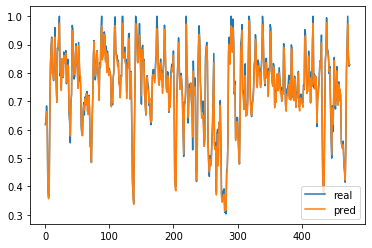

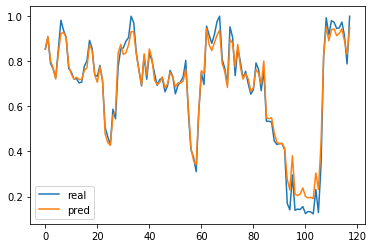

(<tensorflow.python.keras.engine.sequential.Sequential at 0x1fa6b9bfec8>,
 7.144613552093506,
 0.05701465675156805,
 0.00018328409773224686)

In [14]:
rr_values = tt_train1.values
train_X, train_y = rr_values[:,2:],rr_values[:,:2]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))

trainham(model,train_X,train_y) 

train valid rate : 369 93
Epoch 1/200
16/16 - 0s - loss: 10.1032
Epoch 2/200
16/16 - 0s - loss: 7.7387
Epoch 3/200
16/16 - 0s - loss: 6.9568
Epoch 4/200
16/16 - 0s - loss: 6.3739
Epoch 5/200
16/16 - 0s - loss: 6.2823
Epoch 6/200
16/16 - 0s - loss: 5.9880
Epoch 7/200
16/16 - 0s - loss: 5.7269
Epoch 8/200
16/16 - 0s - loss: 5.6542
Epoch 9/200
16/16 - 0s - loss: 5.5933
Epoch 10/200
16/16 - 0s - loss: 5.3575
Epoch 11/200
16/16 - 0s - loss: 5.4772
Epoch 12/200
16/16 - 0s - loss: 5.1285
Epoch 13/200
16/16 - 0s - loss: 4.9676
Epoch 14/200
16/16 - 0s - loss: 4.9644
Epoch 15/200
16/16 - 0s - loss: 4.5290
Epoch 16/200
16/16 - 0s - loss: 4.5613
Epoch 17/200
16/16 - 0s - loss: 4.5154
Epoch 18/200
16/16 - 0s - loss: 4.4037
Epoch 19/200
16/16 - 0s - loss: 4.2763
Epoch 20/200
16/16 - 0s - loss: 4.1888
Epoch 21/200
16/16 - 0s - loss: 4.0171
Epoch 22/200
16/16 - 0s - loss: 4.0490
Epoch 23/200
16/16 - 0s - loss: 4.0436
Epoch 24/200
16/16 - 0s - loss: 4.0490
Epoch 25/200
16/16 - 0s - loss: 4.0188
Epoch 2

Epoch 6/200
16/16 - 0s - loss: 2.5955
Epoch 7/200
16/16 - 0s - loss: 2.5269
Epoch 8/200
16/16 - 0s - loss: 2.2257
Epoch 9/200
16/16 - 0s - loss: 2.2754
Epoch 10/200
16/16 - 0s - loss: 2.2640
Epoch 11/200
16/16 - 0s - loss: 2.2458
Epoch 12/200
16/16 - 0s - loss: 2.3903
Epoch 13/200
16/16 - 0s - loss: 2.3305
Epoch 14/200
16/16 - 0s - loss: 2.1960
Epoch 15/200
16/16 - 0s - loss: 2.0932
Epoch 16/200
16/16 - 0s - loss: 2.0045
Epoch 17/200
16/16 - 0s - loss: 2.0984
Epoch 18/200
16/16 - 0s - loss: 2.2987
Epoch 19/200
16/16 - 0s - loss: 2.1508
Epoch 20/200
16/16 - 0s - loss: 2.1693
Epoch 21/200
16/16 - 0s - loss: 2.1208
Epoch 22/200
16/16 - 0s - loss: 1.9539
Epoch 23/200
16/16 - 0s - loss: 1.8310
Epoch 24/200
16/16 - 0s - loss: 1.8116
Epoch 25/200
16/16 - 0s - loss: 1.8232
Epoch 26/200
16/16 - 0s - loss: 1.8815
Epoch 27/200
16/16 - 0s - loss: 1.9426
Epoch 28/200
16/16 - 0s - loss: 1.8294
Epoch 29/200
16/16 - 0s - loss: 1.7957
Epoch 30/200
16/16 - 0s - loss: 1.9036
Epoch 31/200
16/16 - 0s - los

Epoch 12/200
16/16 - 0s - loss: 1.9544
Epoch 13/200
16/16 - 0s - loss: 1.7583
Epoch 14/200
16/16 - 0s - loss: 1.8240
Epoch 15/200
16/16 - 0s - loss: 1.8240
Epoch 16/200
16/16 - 0s - loss: 1.7506
Epoch 17/200
16/16 - 0s - loss: 1.6204
Epoch 18/200
16/16 - 0s - loss: 1.5317
Epoch 19/200
16/16 - 0s - loss: 1.4665
Epoch 20/200
16/16 - 0s - loss: 1.5245
Epoch 21/200
16/16 - 0s - loss: 1.6132
Epoch 22/200
16/16 - 0s - loss: 1.4950
Epoch 23/200
16/16 - 0s - loss: 1.7312
Epoch 24/200
16/16 - 0s - loss: 1.6182
Epoch 25/200
16/16 - 0s - loss: 1.7247
Epoch 26/200
16/16 - 0s - loss: 1.6172
Epoch 27/200
16/16 - 0s - loss: 1.9588
Epoch 28/200
16/16 - 0s - loss: 1.8985
Epoch 29/200
16/16 - 0s - loss: 1.9529
Epoch 30/200
16/16 - 0s - loss: 1.9175
Epoch 31/200
16/16 - 0s - loss: 1.7204
Epoch 32/200
16/16 - 0s - loss: 1.9710
Epoch 33/200
16/16 - 0s - loss: 1.6447
Epoch 34/200
16/16 - 0s - loss: 1.7497
Epoch 35/200
16/16 - 0s - loss: 1.6476
Epoch 36/200
16/16 - 0s - loss: 1.7177
Epoch 37/200
16/16 - 0s -

Epoch 18/200
16/16 - 0s - loss: 1.4952
Epoch 19/200
16/16 - 0s - loss: 1.3913
Epoch 20/200
16/16 - 0s - loss: 1.3403
Epoch 21/200
16/16 - 0s - loss: 1.3160
Epoch 22/200
16/16 - 0s - loss: 1.3581
Epoch 23/200
16/16 - 0s - loss: 1.3621
Epoch 24/200
16/16 - 0s - loss: 1.4407
Epoch 25/200
16/16 - 0s - loss: 1.5741
Epoch 26/200
16/16 - 0s - loss: 1.6239
Epoch 27/200
16/16 - 0s - loss: 1.4441
Epoch 28/200
16/16 - 0s - loss: 1.3375
Epoch 29/200
16/16 - 0s - loss: 1.4630
Epoch 30/200
16/16 - 0s - loss: 1.3390
Epoch 31/200
16/16 - 0s - loss: 1.3225
Epoch 32/200
16/16 - 0s - loss: 1.4710
Epoch 33/200
16/16 - 0s - loss: 1.4521
Epoch 34/200
16/16 - 0s - loss: 1.4703
Epoch 35/200
16/16 - 0s - loss: 1.6001
Epoch 36/200
16/16 - 0s - loss: 1.5157
Epoch 37/200
16/16 - 0s - loss: 1.4673
Epoch 38/200
16/16 - 0s - loss: 1.5156
Epoch 39/200
16/16 - 0s - loss: 1.4695
Epoch 40/200
16/16 - 0s - loss: 1.4037
Epoch 41/200
16/16 - 0s - loss: 1.5497
Epoch 42/200
16/16 - 0s - loss: 1.3981
Epoch 43/200
16/16 - 0s -

Epoch 24/200
16/16 - 0s - loss: 1.4738
Epoch 25/200
16/16 - 0s - loss: 1.4795
Epoch 26/200
16/16 - 0s - loss: 1.5113
Epoch 27/200
16/16 - 0s - loss: 1.5618
Epoch 28/200
16/16 - 0s - loss: 1.6820
Epoch 29/200
16/16 - 0s - loss: 1.3976
Epoch 30/200
16/16 - 0s - loss: 1.5564
Epoch 31/200
16/16 - 0s - loss: 1.5768
Epoch 32/200
16/16 - 0s - loss: 1.3376
Epoch 33/200
16/16 - 0s - loss: 1.4525
Epoch 34/200
16/16 - 0s - loss: 1.7956
Epoch 35/200
16/16 - 0s - loss: 1.5603
Epoch 36/200
16/16 - 0s - loss: 1.4339
Epoch 37/200
16/16 - 0s - loss: 1.5190
Epoch 38/200
16/16 - 0s - loss: 1.3390
Epoch 39/200
16/16 - 0s - loss: 1.3335
Epoch 40/200
16/16 - 0s - loss: 1.3688
Epoch 41/200
16/16 - 0s - loss: 1.4656
Epoch 42/200
16/16 - 0s - loss: 1.3125
Epoch 43/200
16/16 - 0s - loss: 1.4636
Epoch 44/200
16/16 - 0s - loss: 1.6045
Epoch 45/200
16/16 - 0s - loss: 1.5851
Epoch 46/200
16/16 - 0s - loss: 1.7005
Epoch 47/200
16/16 - 0s - loss: 1.6490
Epoch 48/200
16/16 - 0s - loss: 1.5285
Epoch 49/200
16/16 - 0s -

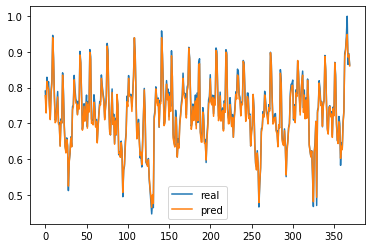

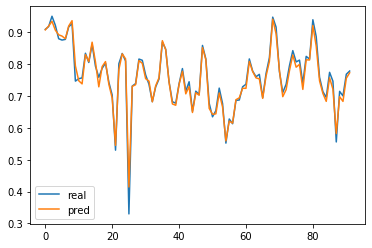

(<tensorflow.python.keras.engine.sequential.Sequential at 0x1fa6b9bfec8>,
 2.1032401084899903,
 0.020047660281950073,
 6.287015887119304e-05)

In [16]:
rr_values = tt_train2.values
train_X, train_y = rr_values[:,2:],rr_values[:,:2]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))

trainham(model,train_X,train_y) 

train valid rate : 84 21
Epoch 1/200
4/4 - 0s - loss: 25.9200
Epoch 2/200
4/4 - 0s - loss: 24.5223
Epoch 3/200
4/4 - 0s - loss: 23.7575
Epoch 4/200
4/4 - 0s - loss: 23.4042
Epoch 5/200
4/4 - 0s - loss: 22.9474
Epoch 6/200
4/4 - 0s - loss: 22.5928
Epoch 7/200
4/4 - 0s - loss: 22.4279
Epoch 8/200
4/4 - 0s - loss: 22.4506
Epoch 9/200
4/4 - 0s - loss: 22.1374
Epoch 10/200
4/4 - 0s - loss: 21.7310
Epoch 11/200
4/4 - 0s - loss: 21.5845
Epoch 12/200
4/4 - 0s - loss: 21.2348
Epoch 13/200
4/4 - 0s - loss: 21.2508
Epoch 14/200
4/4 - 0s - loss: 20.7036
Epoch 15/200
4/4 - 0s - loss: 20.4406
Epoch 16/200
4/4 - 0s - loss: 20.1128
Epoch 17/200
4/4 - 0s - loss: 19.8992
Epoch 18/200
4/4 - 0s - loss: 19.6074
Epoch 19/200
4/4 - 0s - loss: 19.5427
Epoch 20/200
4/4 - 0s - loss: 19.4798
Epoch 21/200
4/4 - 0s - loss: 18.8511
Epoch 22/200
4/4 - 0s - loss: 18.2659
Epoch 23/200
4/4 - 0s - loss: 18.0673
Epoch 24/200
4/4 - 0s - loss: 17.6284
Epoch 25/200
4/4 - 0s - loss: 17.5655
Epoch 26/200
4/4 - 0s - loss: 17.1

Epoch 16/200
4/4 - 0s - loss: 3.8674
Epoch 17/200
4/4 - 0s - loss: 3.5238
Epoch 18/200
4/4 - 0s - loss: 3.4957
Epoch 19/200
4/4 - 0s - loss: 4.0772
Epoch 20/200
4/4 - 0s - loss: 3.6680
Epoch 21/200
4/4 - 0s - loss: 3.5903
Epoch 22/200
4/4 - 0s - loss: 3.3020
Epoch 23/200
4/4 - 0s - loss: 3.4709
Epoch 24/200
4/4 - 0s - loss: 3.2240
Epoch 25/200
4/4 - 0s - loss: 3.3840
Epoch 26/200
4/4 - 0s - loss: 3.0942
Epoch 27/200
4/4 - 0s - loss: 3.6380
Epoch 28/200
4/4 - 0s - loss: 3.4226
Epoch 29/200
4/4 - 0s - loss: 3.4304
Epoch 30/200
4/4 - 0s - loss: 3.1698
Epoch 31/200
4/4 - 0s - loss: 3.1528
Epoch 32/200
4/4 - 0s - loss: 2.8469
Epoch 33/200
4/4 - 0s - loss: 3.1583
Epoch 34/200
4/4 - 0s - loss: 3.1933
Epoch 35/200
4/4 - 0s - loss: 2.9457
Epoch 36/200
4/4 - 0s - loss: 3.1373
Epoch 37/200
4/4 - 0s - loss: 2.7951
Epoch 38/200
4/4 - 0s - loss: 2.6480
Epoch 39/200
4/4 - 0s - loss: 3.3771
Epoch 40/200
4/4 - 0s - loss: 3.1710
Epoch 41/200
4/4 - 0s - loss: 3.5051
Epoch 42/200
4/4 - 0s - loss: 2.6516
E

Epoch 33/200
4/4 - 0s - loss: 2.3009
Epoch 34/200
4/4 - 0s - loss: 2.5828
Epoch 35/200
4/4 - 0s - loss: 2.4193
Epoch 36/200
4/4 - 0s - loss: 3.1454
Epoch 37/200
4/4 - 0s - loss: 3.0864
Epoch 38/200
4/4 - 0s - loss: 2.9131
Epoch 39/200
4/4 - 0s - loss: 2.1314
Epoch 40/200
4/4 - 0s - loss: 2.5981
Epoch 41/200
4/4 - 0s - loss: 2.4847
Epoch 42/200
4/4 - 0s - loss: 2.5842
Epoch 43/200
4/4 - 0s - loss: 2.7616
Epoch 44/200
4/4 - 0s - loss: 3.4277
Epoch 45/200
4/4 - 0s - loss: 2.9278
Epoch 46/200
4/4 - 0s - loss: 2.8057
Epoch 47/200
4/4 - 0s - loss: 3.0055
Epoch 48/200
4/4 - 0s - loss: 2.5358
Epoch 49/200
4/4 - 0s - loss: 2.9755
Epoch 50/200
4/4 - 0s - loss: 2.2916
Epoch 51/200
4/4 - 0s - loss: 2.9480
Epoch 52/200
4/4 - 0s - loss: 2.6032
Epoch 53/200
4/4 - 0s - loss: 2.7132
Epoch 54/200
4/4 - 0s - loss: 2.5796
Epoch 55/200
4/4 - 0s - loss: 2.3658
Epoch 56/200
4/4 - 0s - loss: 2.4282
Epoch 57/200
4/4 - 0s - loss: 2.4702
Epoch 58/200
4/4 - 0s - loss: 2.1727
Epoch 59/200
4/4 - 0s - loss: 2.7870
E

Epoch 50/200
4/4 - 0s - loss: 2.3285
Epoch 51/200
4/4 - 0s - loss: 1.9523
Epoch 52/200
4/4 - 0s - loss: 2.2210
Epoch 53/200
4/4 - 0s - loss: 2.1773
Epoch 54/200
4/4 - 0s - loss: 2.2189
Epoch 55/200
4/4 - 0s - loss: 2.3635
Epoch 56/200
4/4 - 0s - loss: 2.3066
Epoch 57/200
4/4 - 0s - loss: 2.2723
Epoch 58/200
4/4 - 0s - loss: 1.8593
Epoch 59/200
4/4 - 0s - loss: 1.8209
Epoch 60/200
4/4 - 0s - loss: 2.0657
Epoch 61/200
4/4 - 0s - loss: 2.3945
Epoch 62/200
4/4 - 0s - loss: 2.4187
Epoch 63/200
4/4 - 0s - loss: 2.6764
Epoch 64/200
4/4 - 0s - loss: 2.1226
Epoch 65/200
4/4 - 0s - loss: 1.9600
Epoch 66/200
4/4 - 0s - loss: 2.1720
Epoch 67/200
4/4 - 0s - loss: 1.7224
Epoch 68/200
4/4 - 0s - loss: 1.9454
Epoch 69/200
4/4 - 0s - loss: 2.3133
Epoch 70/200
4/4 - 0s - loss: 1.9107
Epoch 71/200
4/4 - 0s - loss: 2.3163
Epoch 72/200
4/4 - 0s - loss: 2.3786
Epoch 73/200
4/4 - 0s - loss: 2.2404
Epoch 74/200
4/4 - 0s - loss: 2.2651
Epoch 75/200
4/4 - 0s - loss: 2.4479
Epoch 76/200
4/4 - 0s - loss: 2.1018
E

Epoch 67/200
4/4 - 0s - loss: 1.7385
Epoch 68/200
4/4 - 0s - loss: 2.0388
Epoch 69/200
4/4 - 0s - loss: 1.9821
Epoch 70/200
4/4 - 0s - loss: 1.9830
Epoch 71/200
4/4 - 0s - loss: 1.9668
Epoch 72/200
4/4 - 0s - loss: 1.9073
Epoch 73/200
4/4 - 0s - loss: 1.7826
Epoch 74/200
4/4 - 0s - loss: 1.9031
Epoch 75/200
4/4 - 0s - loss: 1.9570
Epoch 76/200
4/4 - 0s - loss: 1.7833
Epoch 77/200
4/4 - 0s - loss: 2.4004
Epoch 78/200
4/4 - 0s - loss: 1.7418
Epoch 79/200
4/4 - 0s - loss: 2.1254
Epoch 80/200
4/4 - 0s - loss: 1.6630
Epoch 81/200
4/4 - 0s - loss: 1.6708
Epoch 82/200
4/4 - 0s - loss: 1.7912
Epoch 83/200
4/4 - 0s - loss: 1.7485
Epoch 84/200
4/4 - 0s - loss: 1.5249
Epoch 85/200
4/4 - 0s - loss: 1.8853
Epoch 86/200
4/4 - 0s - loss: 1.8533
Epoch 87/200
4/4 - 0s - loss: 1.8238
Epoch 88/200
4/4 - 0s - loss: 2.0680
Epoch 89/200
4/4 - 0s - loss: 1.8514
Epoch 90/200
4/4 - 0s - loss: 1.5832
Epoch 91/200
4/4 - 0s - loss: 2.1004
Epoch 92/200
4/4 - 0s - loss: 2.1347
Epoch 93/200
4/4 - 0s - loss: 1.6980
E

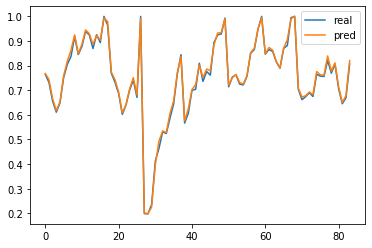

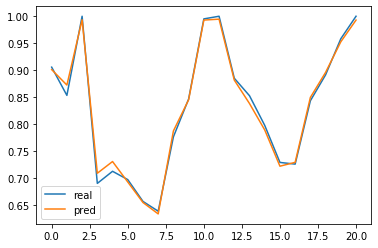

(<tensorflow.python.keras.engine.sequential.Sequential at 0x1fa6b9bfec8>,
 6.228238987922668,
 0.049109700704647166,
 0.00015281624073170362)

In [18]:
rr_values = tt_train3.values
train_X, train_y = rr_values[:,2:],rr_values[:,:2]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))

trainham(model,train_X,train_y) 